In [4]:
# Let's import python libraries First

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
# import csv file
df = pd.read_csv('Sales_Data.csv', encoding= 'unicode_escape')

In [6]:
#Check Number of rows and Columns
df.shape

(11257, 13)

In [9]:
#To see the imported data
df.head(5)  # Show Top 5 Rows 

,User_ID,Cust_name,Product_ID,Age,Age Group,Gender,State,Zone,Zipcode,Profession,Product_Category,Orders,Amount
0,1002903.0,Anvi,P00125942,27.0,26-35,Female,Maharashtra,West,NaN,Healthcare,Sports,4.0,20500.0
1,1000732.0,Shanta,P00110942,34.0,26-35,Female,Andhra Pradesh,South,NaN,Govt,Sports,2.0,25360.0
2,1001990.0,Sheetal,P00118542,16.0,0-17,Female,Uttar Pradesh,Central,NaN,Automobile,Health,4.0,29350.0
3,1001425.0,Virendra,P00237842,16.0,0-17,M,Karnataka,South,NaN,Construction,Clothing,6.0,23500.0
4,1000588.0,Vishal,P00057942,28.0,26-35,M,Gujarat,West,NaN,Food Processing,Electronics,4.0,23870.0


In [20]:
#Field details and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257 entries, 0 to 11256
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11245 non-null  float64
 1   Cust_name         11245 non-null  object 
 2   Product_ID        11245 non-null  object 
 3   Age               11245 non-null  float64
 4   Age Group         11245 non-null  object 
 5   Gender            11245 non-null  object 
 6   State             11245 non-null  object 
 7   Zone              11245 non-null  object 
 8   Zipcode           0 non-null      float64
 9   Profession        11245 non-null  object 
 10  Product_Category  11245 non-null  object 
 11  Orders            11245 non-null  float64
 12  Amount            11245 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


## Let's Start Data Cleaning

In [12]:
#Deleting blank column
df.drop(['Zipcode'], axis=1,inplace=True)

In [13]:
#List of Columns Available
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Age', 'Age Group', 'Gender',
       'State', 'Zone', 'Profession', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [23]:
#check for null values
pd.isnull(df).sum()

User_ID             12
Cust_name           12
Product_ID          12
Age                 12
Age Group           12
Gender              12
State               12
Zone                12
Profession          12
Product_Category    12
Orders              12
Amount              12
dtype: int64

In [24]:
# drop null values
df.dropna(how='all', inplace=True)

In [25]:
df.shape

(11245, 12)

In [25]:
#replace value of Gender Column
df['Gender'] = df['Gender'].replace('M', 'Male')


In [26]:
#View only Male Gender data
df[df['Gender'] == 'Male']

,User_ID,Cust_name,Product_ID,Age,Age Group,Gender,State,Zone,Profession,Product_Category,Orders,Amount
3,1001425.0,Virendra,P00237842,16.0,0-17,Male,Karnataka,South,Construction,Clothing,6.0,23500.0
4,1000588.0,Vishal,P00057942,28.0,26-35,Male,Gujarat,West,Food Processing,Electronics,4.0,23870.0
5,1000588.0,Suuraj,P00057942,28.0,26-35,Male,Himachal Pradesh,Northern,Food Processing,Electronics,3.0,23860.0
8,1003224.0,Kushal,P00205642,35.0,26-35,Male,Uttar Pradesh,Central,Govt,Beauty,4.0,23809.0
11,1003829.0,Harsh,P00200842,34.0,26-35,Male,Delhi,Central,Banking,Health,2.0,23770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11249,1005446.0,Sheetal,P00297742,53.0,51-55,Male,Gujarat,West,Healthcare,Health,3.0,382.0
11250,1005446.0,Sheetal,P00297742,53.0,51-55,Male,Madhya Pradesh,Central,Healthcare,Health,2.0,382.0
11252,1000695.0,Manning,P00296942,19.0,18-25,Male,Maharashtra,West,Chemical,Health,1.0,370.0
11253,1004089.0,Reichenbach,P00171342,33.0,26-35,Male,Haryana,Northern,Healthcare,Health,5.0,367.0


## --> Now Let's Learn EDA - Exploratory Data Analysis

In [27]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Orders,Amount
count,1.124500e+04,11245.000000,11245.000000,11245.000000
mean,1.003004e+06,35.415651,3.500311,9461.934237
std,1.716207e+03,12.756369,1.713706,5234.426634
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,4.000000,8109.000000
75%,1.004429e+06,43.000000,5.000000,12683.000000
max,1.006040e+06,92.000000,6.000000,29350.000000


In [19]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11245.000000,11245.000000,11245.000000
mean,35.415651,3.500311,9461.934237
std,12.756369,1.713706,5234.426634
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,4.000000,8109.000000
75%,43.000000,5.000000,12683.000000
max,92.000000,6.000000,29350.000000


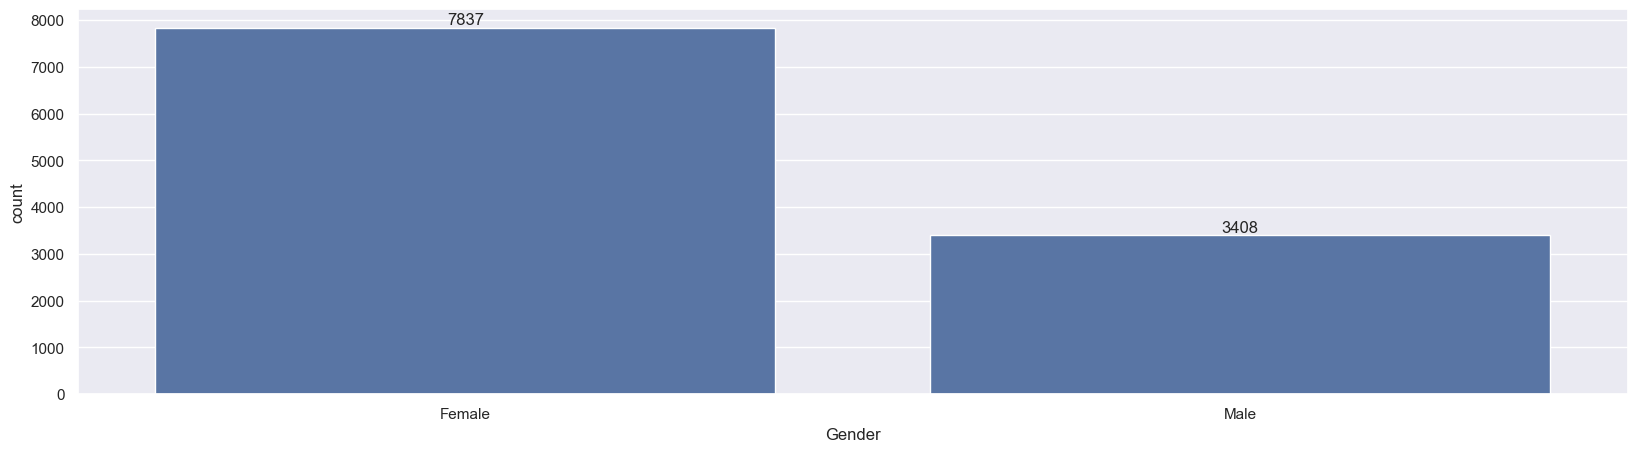

In [86]:
ax=sns.countplot(x='Gender', data = df) #query1
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

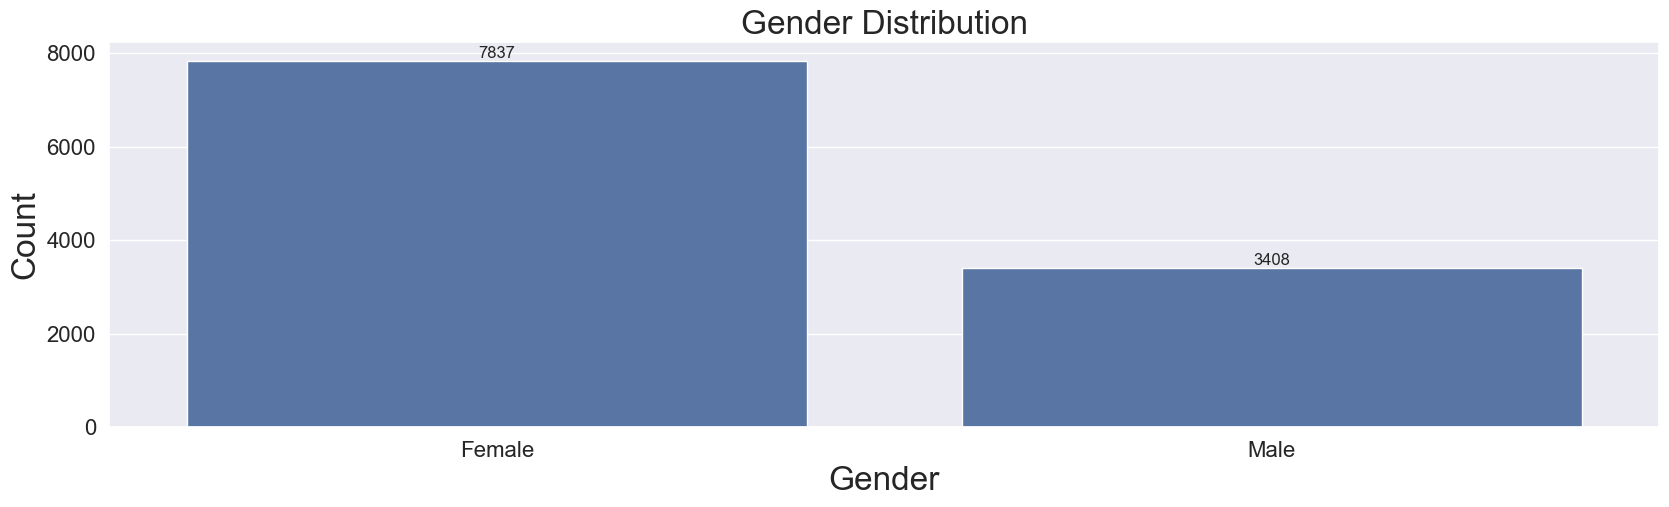

In [37]:
# Total Transactions count by Gender Wise in Bar Chart
ax = sns.countplot(x = 'Gender', data = df)

# Set Title and Labels with Font Size
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set_title('Gender Distribution', fontsize=24)   # Chart Title
    ax.set_xlabel('Gender', fontsize=24)               # X - Axis Label
    ax.set_ylabel('Count', fontsize=24)                # Y - Axis Label 
    ax.tick_params(axis='both', labelsize=16)          # Axis Parameters
plt.show()
    

In [ ]:
# 2 . Gender wise distribution in Pie Chart

In [90]:
#Total Transactions Count by Gender wise 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female    7837
Male      3408
Name: count, dtype: int64


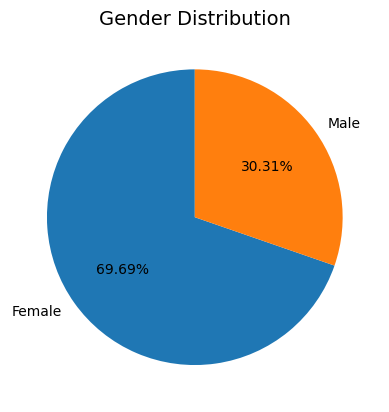

In [31]:
#Total Transactions Count by Gender wise in Pie Chart
gender_counts = df['Gender'].value_counts()

plt.pie(
    gender_counts,                       # Data (counts)
    labels=gender_counts.index,          # Labels (e.g., Male, Female)
    autopct='%.2f%%',                    # Show percentages (2 decimal place)
    startangle=90,                       # Rotate for better orientation
)
# Add a title
plt.title('Gender Distribution', fontsize=14)
plt.show()


In [104]:
df.groupby('Gender', as_index=False)['Amount'].sum()

,Gender,Amount
0,Female,74461610.49
1,Male,31937840.00


In [108]:
Gen_Wise_Sales = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(Gen_Wise_Sales)

   Gender       Amount
0  Female  74461610.49
1    Male  31937840.00


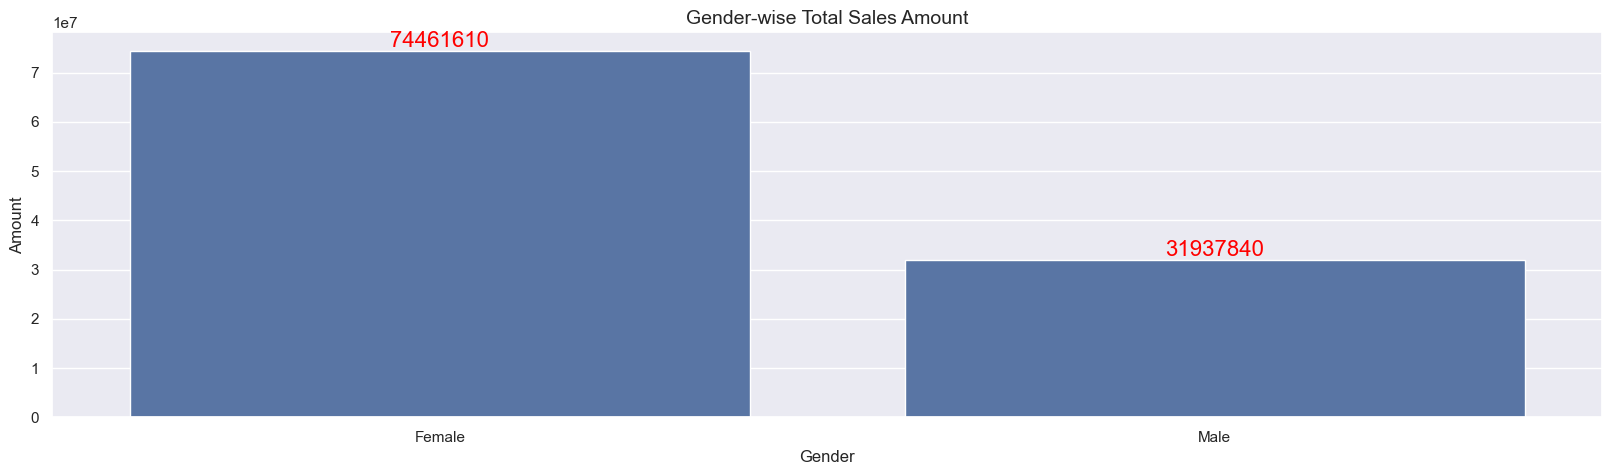

In [113]:
# Gender wise Total Sales Amount

# Step 1: Group data by Gender and sum the Amount
Gen_Wise_Sales = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Step 2: Create the bar plot
ax = sns.barplot(x='Gender', y='Amount', data=Gen_Wise_Sales)

# Step 3: Add data labels on top of bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=16, color='red')  # Show counts as whole numbers
    
# Step 4: Add titles
plt.title('Gender-wise Total Sales Amount', fontsize=14)
plt.show()


Conclusion : Male sales are higher than female sales

### --> Age group wise total transactions

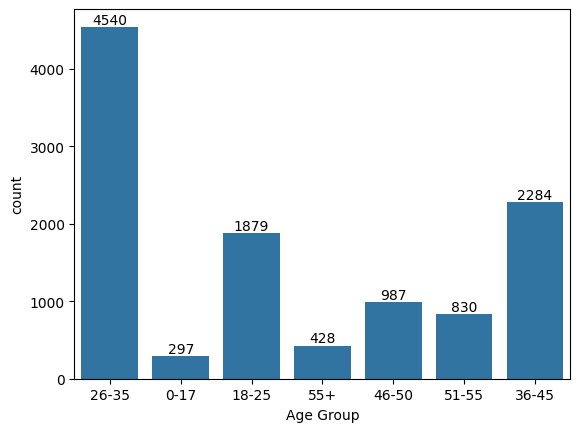

In [33]:
#Age Group wise Transactions Count in Bar Chart
ax = sns.countplot(data = df, x = 'Age Group')

for bars in ax.containers:         #Show Data labels
    ax.bar_label(bars)
plt.show()


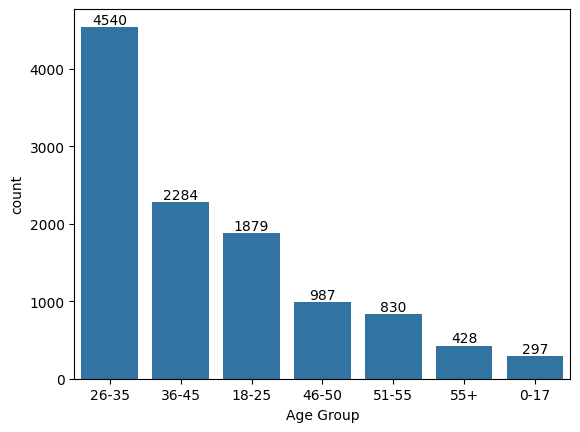

In [35]:
#Step 1 - Age group wise transactions count (Sorting)

age_group_counts=df['Age Group'].value_counts().sort_values(ascending=False)

#Step 2 - Use Ordered categories for sorting in countplot
sns_order=age_group_counts.index

#Age Group wise Transactions Count in Bar Chart
ax = sns.countplot(data = df, x = 'Age Group', order=sns_order)

for bars in ax.containers:         #Show Data labels
    ax.bar_label(bars)
plt.show()




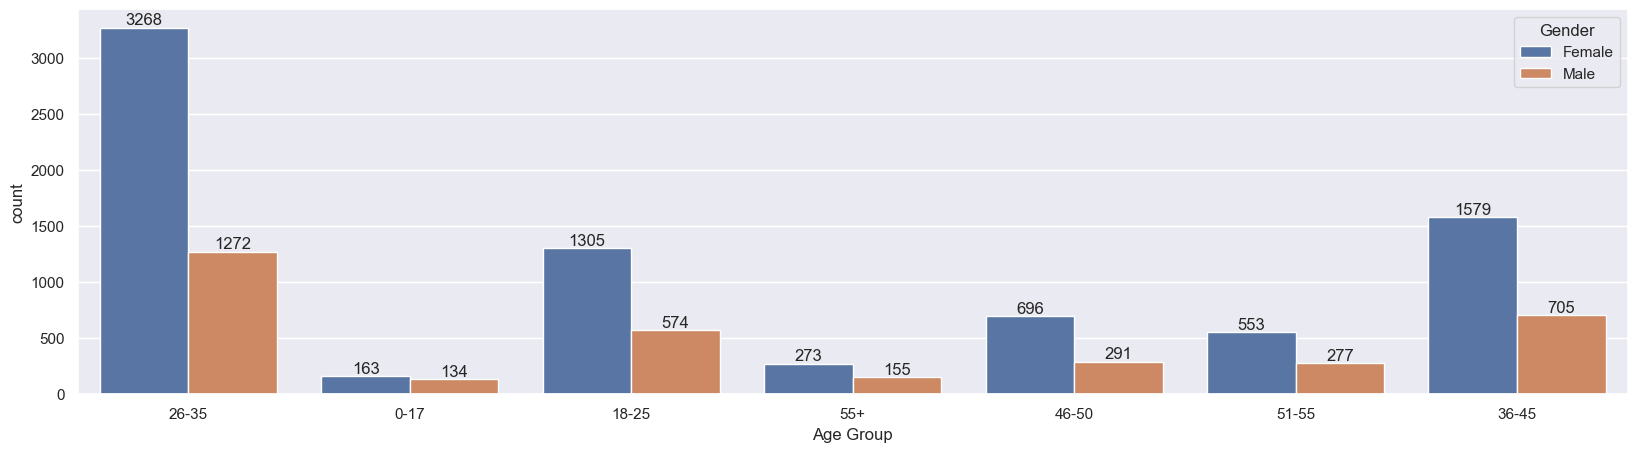

In [123]:
#Age group and Gender wise Transactions distribution

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

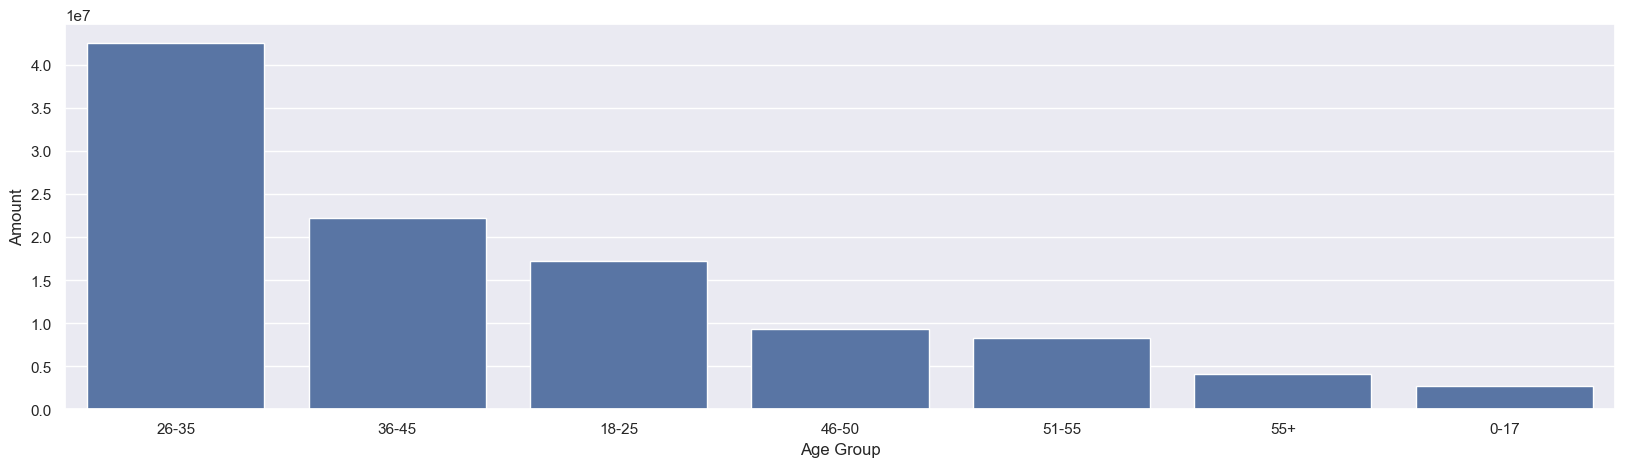

In [127]:
#  Age Group wise Total Amount
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

plt.show()

### --> State wise analysis

In [131]:
order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
print(order_state)

             State  Orders
14   Uttar Pradesh  6669.0
10     Maharashtra  5328.0
7        Karnataka  4506.0
2            Delhi  3893.0
9   Madhya Pradesh  3217.0


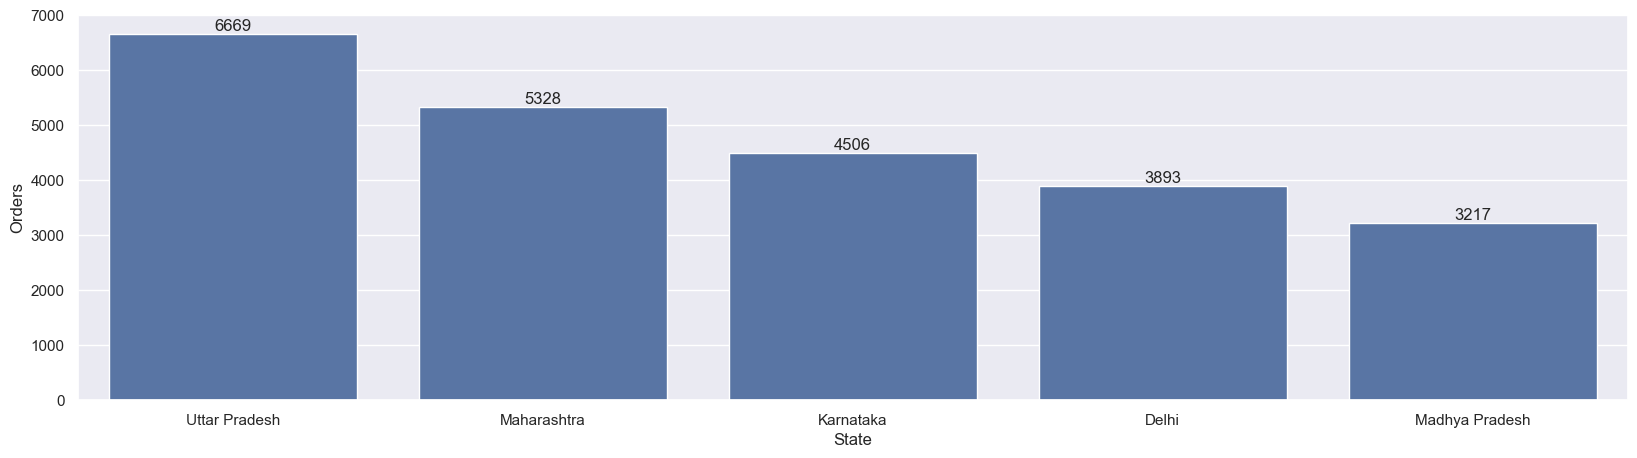

In [133]:
# Order wise Top 5 state
order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

#sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = order_state, x = 'State',y= 'Orders')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

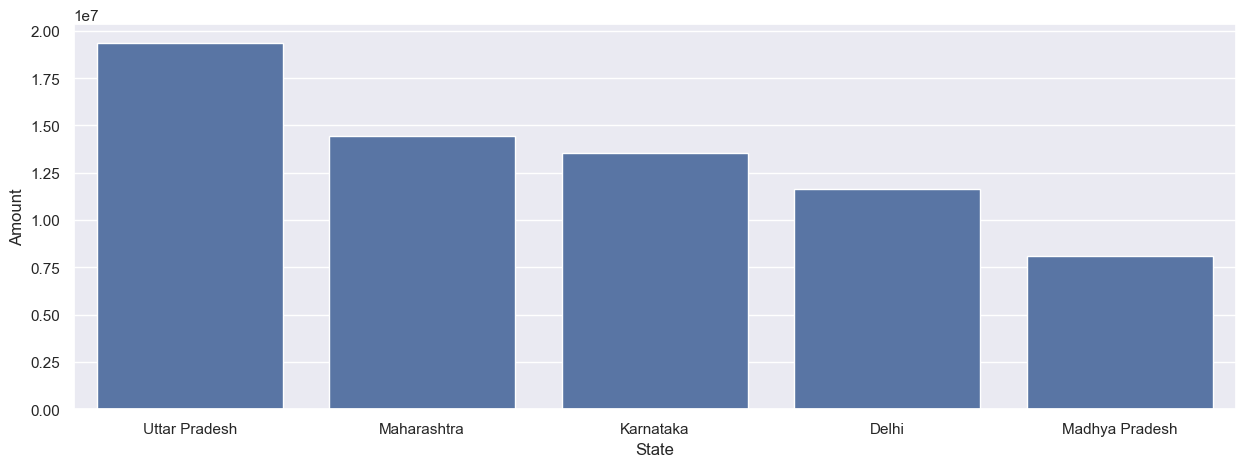

In [138]:
# Amount Wise top 5 state 

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})#to manage text overlapping
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### --> Product_Category Analysis

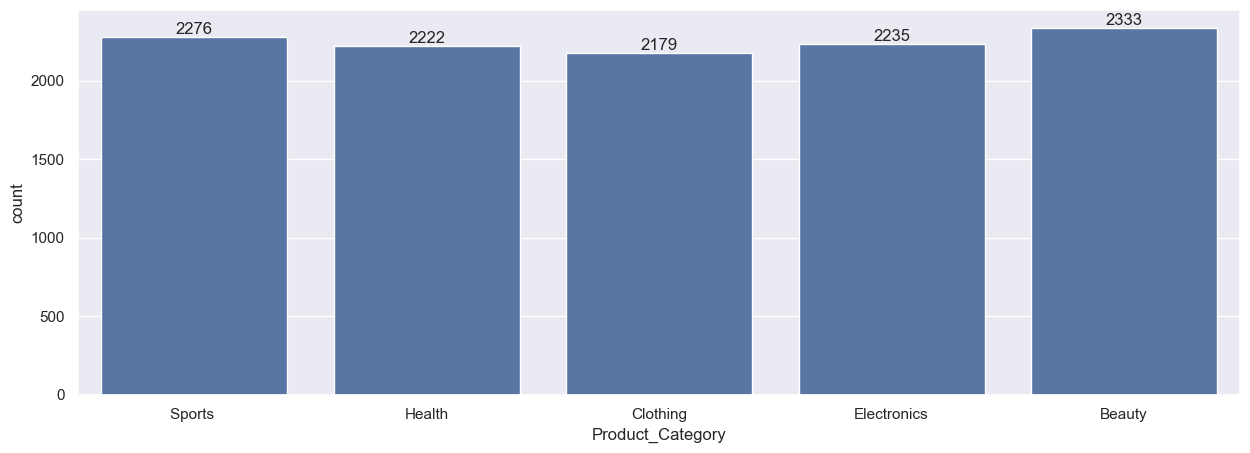

In [139]:
# Product category wise Transactions count
ax = sns.countplot(data = df, x = 'Product_Category')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

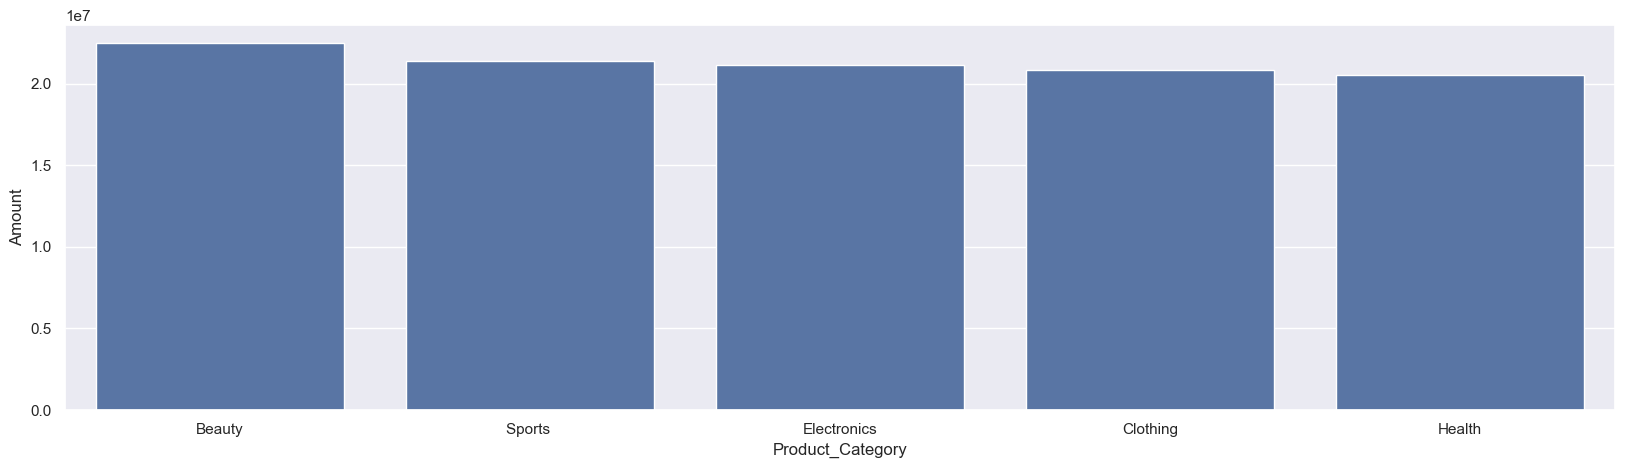

In [140]:
#Amount wise Product Category in Bar Chart
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

plt.show()

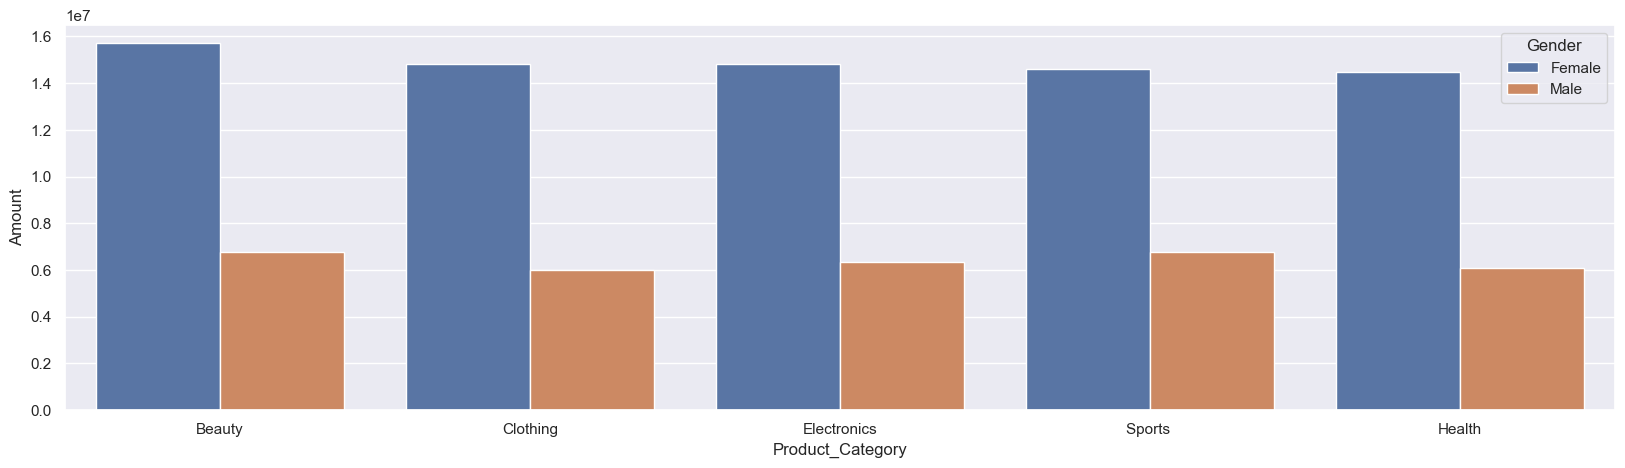

In [141]:
#Product category and Gender wise Transactions count
sales_pro = df.groupby(['Product_Category', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_pro, x = 'Product_Category',y= 'Amount', hue='Gender')

plt.show()


*From above graphs we can see that most of the buyers are Female 

### --> Profession wise Analysis

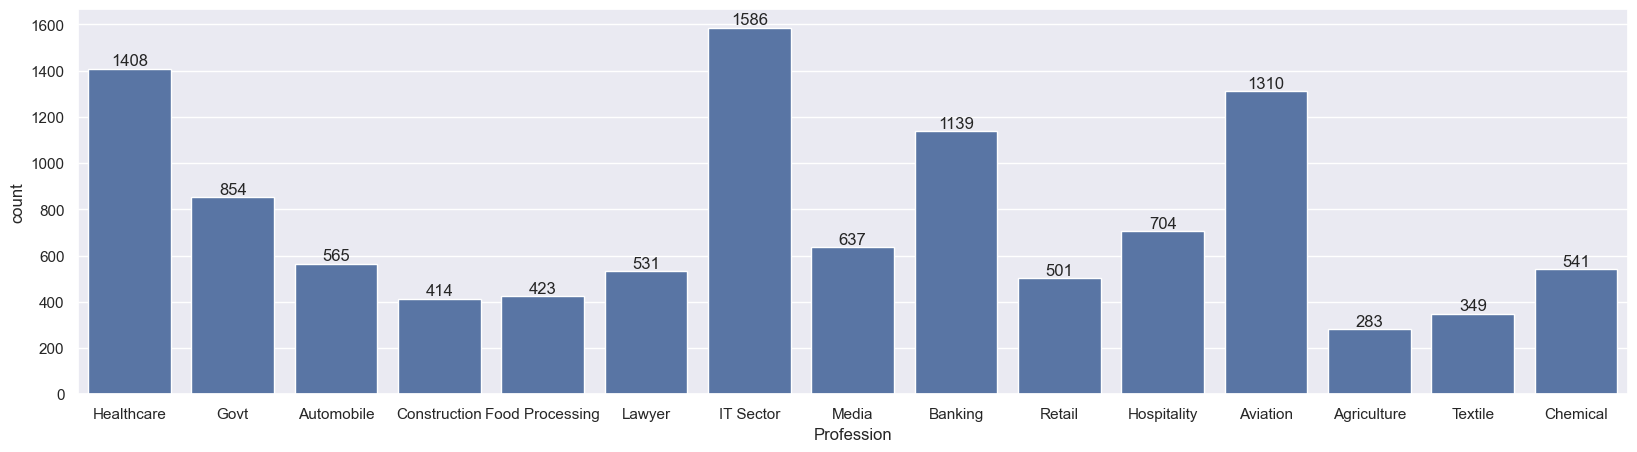

In [142]:
# Profession wise Transactions count

ax = sns.countplot(data = df, x = 'Profession')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


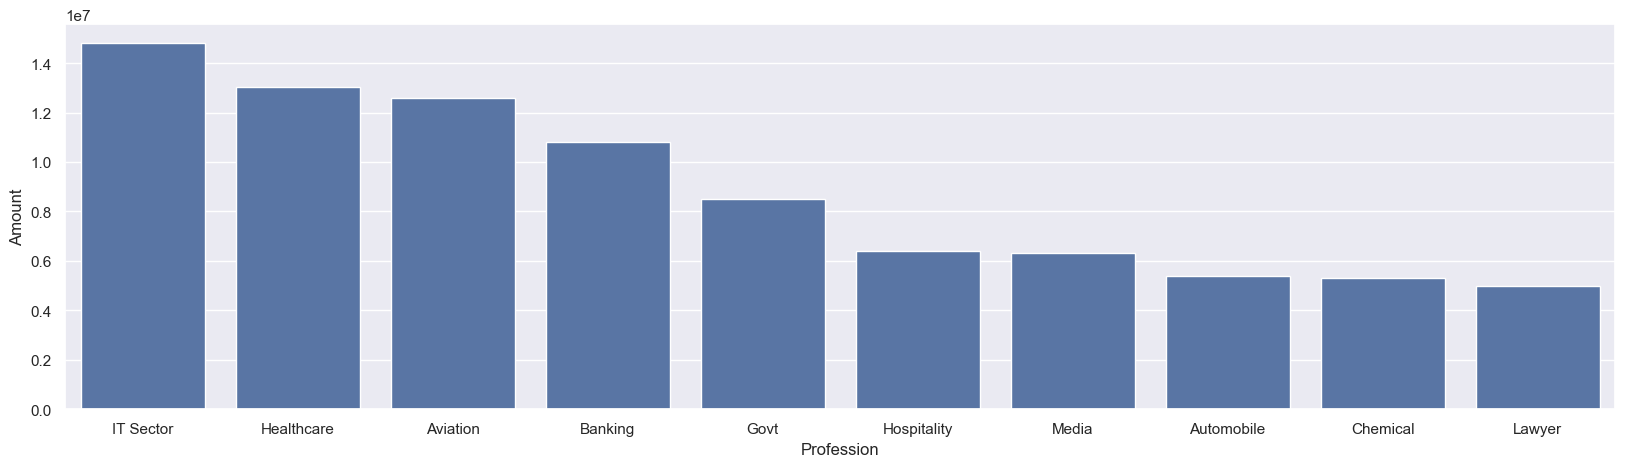

In [36]:
# Amount Wise Top Professions
sales_state = df.groupby(['Profession'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Profession',y= 'Amount')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

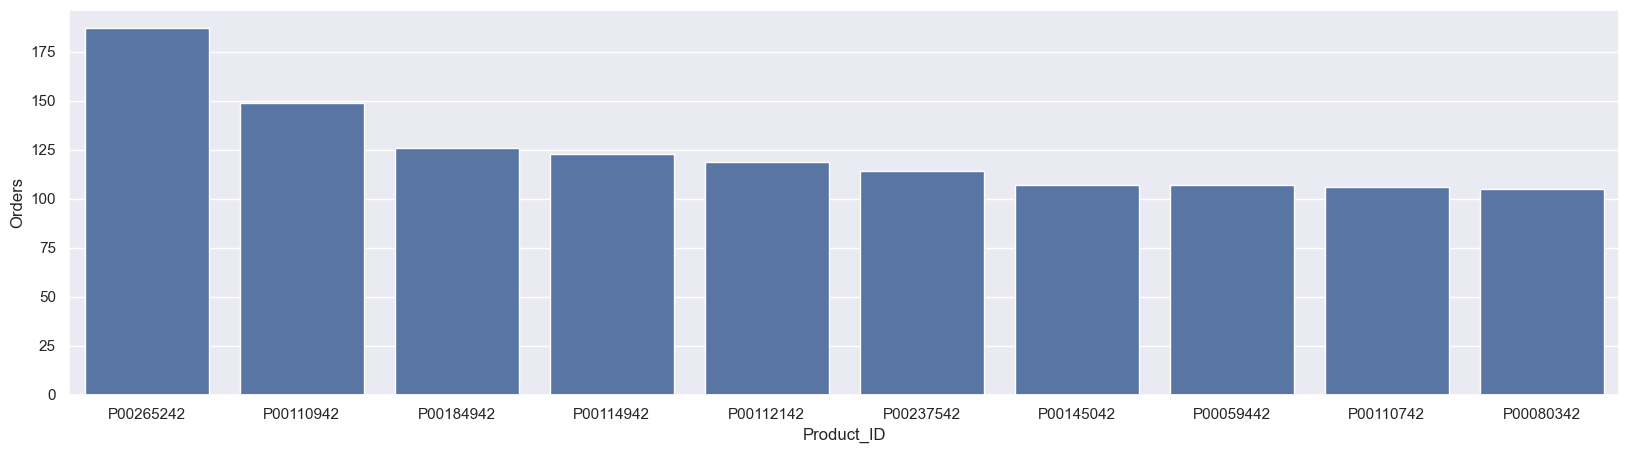

In [148]:
#Order wise Top 10 Product 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

## Conclusion:

### *Female age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Beauty, Sports and Electronics*